In [1]:
import numpy as np
from thirring import Thirring
from matplotlib import pyplot as plt
from util import normalize

In [2]:
def print_pk(qca, k0):
    pk = qca.get_pk(i=0)
    plt.xlabel('k')
    plt.ylabel(r'$\vert{c_k}\vert^2$')
    plt.title('Mode decomposition')
    plt.xticks([k0, k0-np.pi, -k0, -k0+np.pi], [r'$k_0$', r'$k_0-\pi$', r'$-k_0$', r'$\pi-k_0$'])
    plt.plot(np.arange(-L, L)*np.pi/L, np.abs(pk)**2)
    
def plot_px(qw, x1, x2):
    ps = []
    #purity = []
    for i in range(qw.n_particles):
        ps_i = qw.get_px(i)
    #    purity_i = qw.get_purity(0)
        ps.append(ps_i)
    #    purity.append(purity_i)
    ps = sum(ps)
    plt.title('Position probability distribution')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    #for i in range(qw.n_particles):
    #    print(f'P{i+1}={np.real(purity[i]):.2f}', end=' ')
    #print()
    p = plt.plot(range(-qw.L, qw.L), ps)
    plt.xlim([x1, x2])
    return p

def coarse_grain_state(L, psi):
    psi = psi.reshape([2*L, 2])
    rho = psi @ psi.T.conj()
    return rho

def coarse_grain_unitary(L, theta):
    assert L%2 == 0, "L should be even"
    return Thirring._get_one_particle_W(int(L/2), 2*theta)

# Coarse graining

In [72]:
# gaussian packet
n = 1
chi = 0
theta = 0.2
L = 1000
qca = Thirring(L=L, n_particles=n, theta=theta, chi=chi) 

In [73]:
k0s = [0.2]
x0s = [-200]
sigma_k_s = [0.02]
signs = [1]
qca.psi = qca.in_state(k0s=k0s, x0s=x0s, sigma_k_s = sigma_k_s,signs = signs)

CPU times: user 14min 51s, sys: 38.2 s, total: 15min 30s
Wall time: 2min 9s


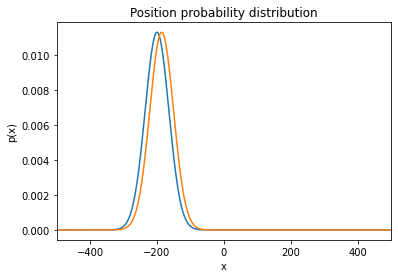

In [74]:
%%time
ds = []
ds_wrong = []
num_steps = 10
step_size = 1
Uir = np.linalg.matrix_power(coarse_grain_unitary(L, theta), step_size)
Uir_wrong = np.linalg.matrix_power(coarse_grain_unitary(L, 0), step_size)
rho_app = coarse_grain_state(L, qca.psi)
rho_app_wrong = coarse_grain_state(L, qca.psi)
xmin = -500
xmax = 500
plot_px(qca, -2, 120)
for i in range(num_steps):
    rho_ex = coarse_grain_state(L, qca.psi)
    ds.append(np.linalg.norm(rho_app - rho_ex, 'nuc')/2)
    ds_wrong.append(np.linalg.norm(rho_app_wrong - rho_ex, 'nuc')/2)
    qca.evolve(2*step_size)
    rho_app = Uir @ rho_app @ Uir.T.conj()
    rho_app_wrong = Uir_wrong @ rho_app_wrong @ Uir_wrong.T.conj()
plot_px(qca, xmin, xmax)

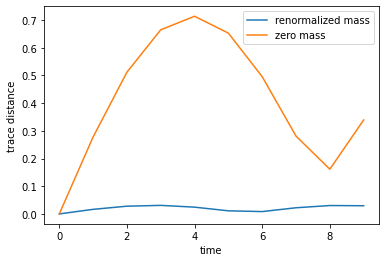

In [75]:
plt.plot(range(num_steps), ds, label='renormalized mass')
plt.plot(range(num_steps), ds_wrong, label='zero mass')
plt.ylabel('trace distance')
plt.xlabel('time')
plt.legend()
plt.savefig('mass_renormalization_2.pdf')
plt.show()

CPU times: user 2h 29min 2s, sys: 6min 8s, total: 2h 35min 11s
Wall time: 21min 34s


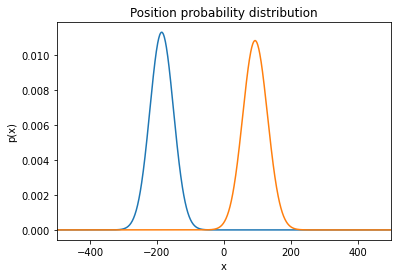

In [69]:
%%time
ds = []
num_steps = 200
step_size = 1
Uir = np.linalg.matrix_power(coarse_grain_unitary(L, theta), step_size)
rho_app = coarse_grain_state(L, qca.psi)
xmin = -500
xmax = 500
plot_px(qca, -2, 120)
for i in range(num_steps):
    rho_ex = coarse_grain_state(L, qca.psi)
    ds.append(np.linalg.norm(rho_app - rho_ex, 'nuc')/2)
    qca.evolve(2*step_size)
    rho_app = Uir @ rho_app @ Uir.T.conj()
plot_px(qca, xmin, xmax)

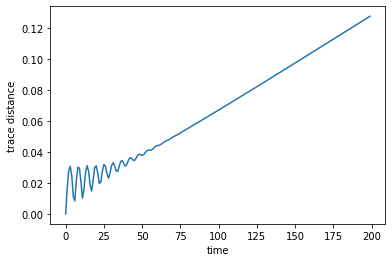

In [70]:
plt.plot(range(num_steps), ds)
plt.ylabel('trace distance')
plt.xlabel('time')
plt.savefig('comparison.pdf')
plt.show()